In [ ]:
import cv2
import pyautogui
import mediapipe as mp
from mediapipe.tasks import python
from mediapipe.tasks.python import vision


SyntaxError: invalid syntax (3372128709.py, line 5)

In [3]:
mp_hands = mp.solutions.hands
hands = mp_hands.Hands(static_image_mode=True, max_num_hands=1)
mp_drawing = mp.solutions.drawing_utils

I0000 00:00:1747676024.983223 1515002 gl_context.cc:369] GL version: 2.1 (2.1 Metal - 89.4), renderer: Apple M1


INFO: Created TensorFlow Lite XNNPACK delegate for CPU.
W0000 00:00:1747676025.009712 1516837 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1747676025.032426 1516837 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.


In [50]:
image = cv2.imread("images/IMG_4512.jpg")
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

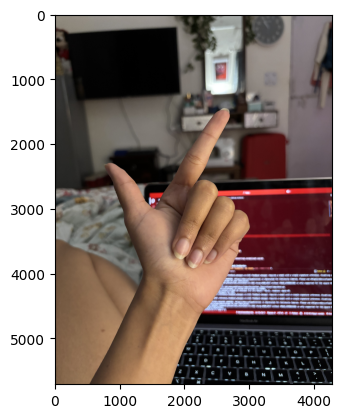

In [53]:
plt.imshow(image_rgb)

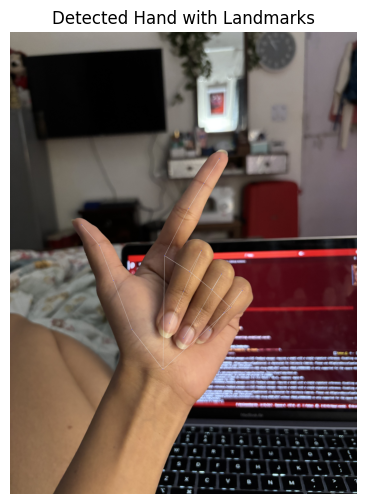


Hand 1 landmarks:
Landmark 0: (x=0.441, y=0.730, z=-0.000)
Landmark 1: (x=0.351, y=0.644, z=-0.039)
Landmark 2: (x=0.298, y=0.538, z=-0.053)
Landmark 3: (x=0.258, y=0.463, z=-0.073)
Landmark 4: (x=0.207, y=0.417, z=-0.092)
Landmark 5: (x=0.445, y=0.484, z=-0.002)
Landmark 6: (x=0.515, y=0.382, z=-0.046)
Landmark 7: (x=0.559, y=0.327, z=-0.079)
Landmark 8: (x=0.604, y=0.274, z=-0.104)
Landmark 9: (x=0.518, y=0.518, z=-0.012)
Landmark 10: (x=0.552, y=0.473, z=-0.116)
Landmark 11: (x=0.501, y=0.561, z=-0.152)
Landmark 12: (x=0.460, y=0.630, z=-0.149)
Landmark 13: (x=0.582, y=0.558, z=-0.028)
Landmark 14: (x=0.610, y=0.524, z=-0.127)
Landmark 15: (x=0.548, y=0.604, z=-0.122)
Landmark 16: (x=0.500, y=0.663, z=-0.088)
Landmark 17: (x=0.635, y=0.597, z=-0.047)
Landmark 18: (x=0.669, y=0.560, z=-0.108)
Landmark 19: (x=0.617, y=0.607, z=-0.095)
Landmark 20: (x=0.576, y=0.646, z=-0.068)


In [59]:
results = hands.process(image_rgb)

# Draw landmarks
if results.multi_hand_landmarks:
    for hand_landmarks in results.multi_hand_landmarks:
        mp_drawing.draw_landmarks(image_rgb, hand_landmarks, mp_hands.HAND_CONNECTIONS)

# Display result
plt.figure(figsize=(8, 6))
plt.imshow(image_rgb)
plt.axis('off')
plt.title('Detected Hand with Landmarks')
plt.show()

# Optional: print landmarks
if results.multi_hand_landmarks:
    for i, hand_landmarks in enumerate(results.multi_hand_landmarks):
        print(f"\nHand {i+1} landmarks:")
        for id, lm in enumerate(hand_landmarks.landmark):
            print(f"Landmark {id}: (x={lm.x:.3f}, y={lm.y:.3f}, z={lm.z:.3f})")
else:
    print("No hands detected.")











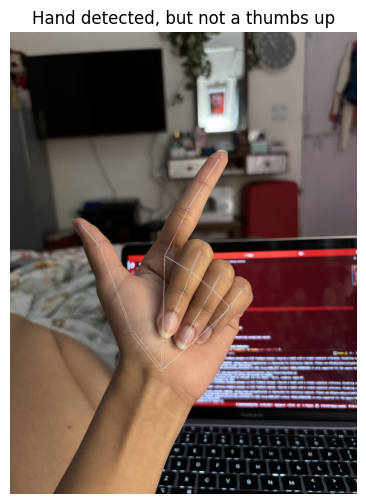

Hand detected, but not a thumbs up


In [60]:

results = hands.process(image_rgb)

# Draw and analyze landmarks
gesture = "No hand detected"
if results.multi_hand_landmarks:
    for hand_landmarks in results.multi_hand_landmarks:
        mp_drawing.draw_landmarks(image_rgb, hand_landmarks, mp_hands.HAND_CONNECTIONS)

        # Get landmark coordinates
        lm = hand_landmarks.landmark

        # Convert normalized landmarks to pixel coordinates (for visualization or advanced checks)
        def y(id): return lm[id].y
        def x(id): return lm[id].x

        # THUMBS UP LOGIC:
        # Thumb tip is above thumb MCP (x-axis spread)
        thumb_up = x(4) < x(3) < x(2)

        # Other fingers: tip y > mcp y (meaning they are curled downwards)
        fingers_folded = all(y(tip) > y(mcp) for tip, mcp in [(8, 5), (12, 9), (16, 13), (20, 17)])

        if thumb_up and fingers_folded:
            gesture = "Thumbs Up Detected 👍"
        else:
            gesture = "Hand detected, but not a thumbs up"

# Show image with landmarks
plt.figure(figsize=(8, 6))
plt.imshow(image_rgb)
plt.axis('off')
plt.title(gesture)
plt.show()

# Print result
print(gesture)


In [56]:
# Draw results and classify gesture
if results.multi_hand_landmarks:
    for hand_landmarks in results.multi_hand_landmarks:
        mp_drawing.draw_landmarks(image, hand_landmarks, mp_hands.HAND_CONNECTIONS)
        landmarks = hand_landmarks.landmark
        gesture = classify_gesture(landmarks)
        cv2.putText(image, gesture, (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 0, 0), 2)



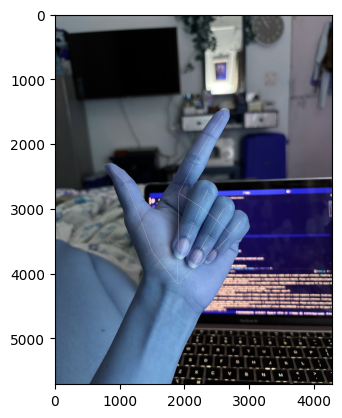

In [57]:
plt.imshow(image)